# Compair SVR with Polynomial regression on prediction accuracy

## Data preprocessing

### Importing the libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data

In [41]:
data = pd.read_csv('Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [42]:
x = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

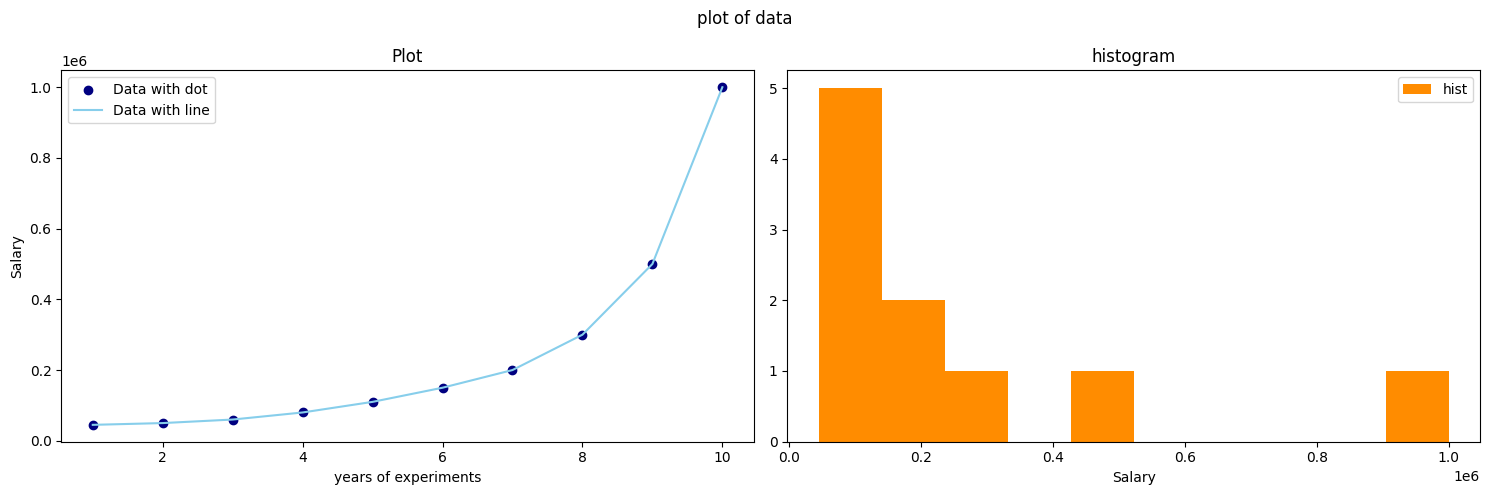

In [43]:
fig, axe = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("plot of data")
axe[0].scatter(x=x, y=y, color='navy',label="Data with dot")
axe[0].plot(x,y,color="skyblue", label="Data with line")
axe[0].set_title("Plot")
axe[0].set_xlabel("years of experiments")
axe[0].set_ylabel("Salary")
axe[0].legend()
axe[1].hist(x=y, color='darkorange', label="hist")
axe[1].legend()
axe[1].set_title("histogram")
axe[1].set_xlabel("Salary")
plt.tight_layout()
plt.show()

## Model Training

### Scaling the data for polynomial regression

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree=4)
x_poly = poly_feature.fit_transform(x)
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

### train the polynomial regression

In [45]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_poly, y)

LinearRegression()

### Make model to predict

In [46]:
y_pred_poly = lr_model.predict(x_poly)
y_pred_poly

array([ 53356.64335675,  31759.90675984,  58642.1911421 ,  94632.86713282,
       121724.94172495, 143275.05827509, 184003.49650352, 289994.17249417,
       528694.63869462, 988916.08391612])

In [47]:
lr_model.predict(poly_feature.fit_transform([[6.5]]))

array([158862.45265155])

### Visualize the polynomial prediction

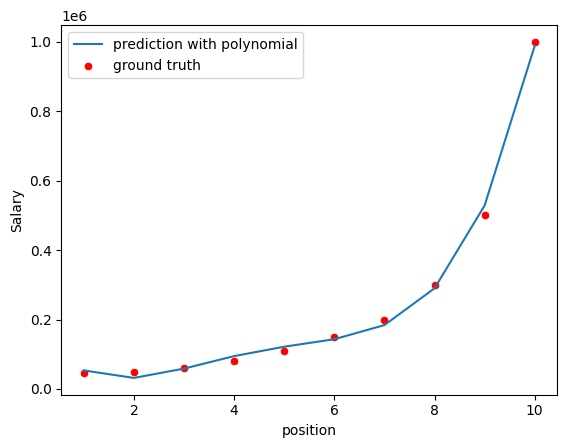

In [48]:
sns.lineplot(x=x[:, 0] , y=y_pred_poly, label='prediction with polynomial')
sns.scatterplot(x=x[:, 0] , y=y, color="red", label="ground truth")
plt.xlabel("position")
plt.ylabel("Salary")
plt.legend()
plt.show()

### Feature scaling for support vector machine model training

In [49]:
y_2D = y.reshape(len(y), 1)

In [50]:
y_2D

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [51]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_s = sc_x.fit_transform(x)
y_s = sc_y.fit_transform(y_2D)
y_s

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

### train SVR model with scaled data

In [52]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(x_s, y_s)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR()

In [53]:
sc_y.inverse_transform(svr_model.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

In [54]:
y_pred_svr = sc_y.inverse_transform(svr_model.predict(x_s).reshape(-1,1))

### Visualising the SVR prediction

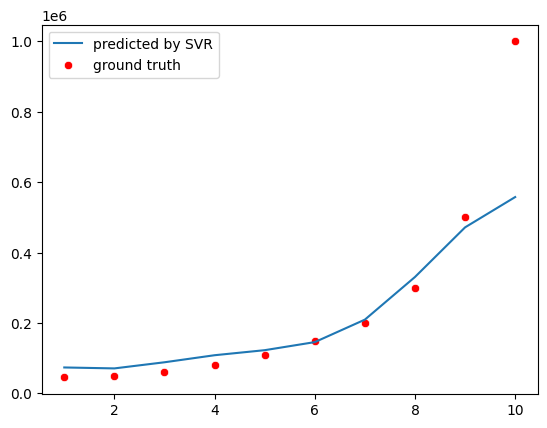

In [55]:
sns.lineplot(x=x[:, 0], y=y_pred_svr[:, 0], label= "predicted by SVR")
sns.scatterplot(x=x[:, 0], y=y, color='red', label="ground truth")
plt.legend()
plt.show()

## Comparing the models

### Compare with visualising

In [56]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=x[:, 0], y=y, name="ground truth", mode="markers"))
fig.add_trace(go.Scatter(x=x[:, 0], y=y_pred_poly, name="predicted by polynomial"))
fig.add_trace(go.Scatter(x=x[:, 0], y=y_pred_svr[:, 0], name="predicted by SVR"))
fig.show()

### Compair models with R2 accuracy

In [57]:
from sklearn.metrics import r2_score
svr_accuracy = r2_score(y, y_pred_svr)
polynomial_accuracy = r2_score(y, y_pred_poly)

### show the accuracy on the bar graph

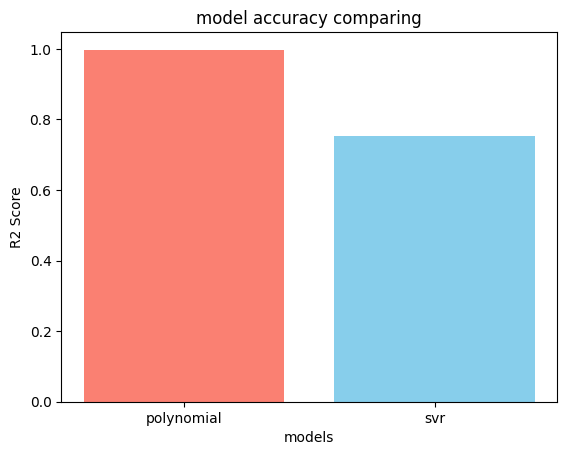

In [58]:
plt.bar(['polynomial', 'svr'], [polynomial_accuracy, svr_accuracy], color=['salmon', 'skyblue'])
plt.xlabel("models")
plt.ylabel("R2 Score")
plt.title("model accuracy comparing")
plt.show()

In [59]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(x=['polynomial', 'svr'], y=[polynomial_accuracy, svr_accuracy], text=[polynomial_accuracy, svr_accuracy],textposition='auto', marker_color=["navy", "gold"])])
fig.update_layout(title_text="model accuracy comparing", xaxis_title="Models", yaxis_title="R2 Score", width=650)
fig.show()

## Make the graphs smoother

In [60]:
x_grid= np.arange(x.min(), x.max(), 0.1).reshape(-1, 1)
x_grid = x_grid.reshape((len(x_grid), 1))
fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=x[:, 0], y=y, mode='markers'))
fig_2.add_trace(go.Scatter(x=x_grid[:, 0], y=lr_model.predict(poly_feature.fit_transform(x_grid)), name="predicted by polynomial"))
fig_2.add_trace(go.Scatter(x=x_grid[:, 0], y=sc_y.inverse_transform(svr_model.predict(sc_x.transform(x_grid)).reshape(-1, 1))[:, 0], name="predicted by SVR"))
fig_2.show()